<a href="https://colab.research.google.com/github/askot19/Analise_de_dados/blob/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%202/ex08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Data Scientist & Analyst**

*by [Paulo Henrique de Melo Ferreira](https://www.linkedin.com/in/paulo-henrique-ferreira-20151374/)*

---

<p style="text-align: justify;">

Este notebook visa aprofundar meus conhecimentos práticos em Ciência de Dados. Meu objetivo aqui é implementar o que já conheço da linguagem Python e desenvolver projetos completos acerca da área. Como bibliografia básica utlizarei o **Projetos de Ciência de Dados com Python - Stephen Klosterman**, que visa tratar dados desde o tipo de a análise mais simples (exploratória de dados) até aplicações envolvendo modelos preditivos e Machine Learning. As ferramentas que utilizarei serão principalmente o **Colaboratory do Google** e o **Jupyter Notebook - Anaconda**. O intuito aqui é consumir toda a literatura e me inserir do dia-a-dia de um profissional de dados, atuando tanto como Cientista quanto como Analista de Dados. Pretendo me tornar um profissional mais qualificado após estes desenvolvimentos.
</p>

---

# 2. Introduction to a Scikit-Learn and Model Evaluation
#### Objetivos

Neste segundo capítulo serão tratados os primeiros passos com Machine Learning e Validação de Modelos. O intuito é ter o primeiro contato com os modelos preditivos mais simples e caminhar para o seu entendimento com uma aplicação prática. Esse trabalho será desenvolvido na plataforma Colaboratory do Google.

In [2]:
# Carregando pacotes necessários para a análise de dados
import pandas as pd #Manipulação de dados
import numpy as np #Computação numérica
import matplotlib.pyplot as plt #Pacote de gráficos
#Renderização de gráficos
%matplotlib inline
import matplotlib as mpl #Adiciona funcionalidades gráficas
mpl.rcParams['figure.dpi'] = 400 #Alta resolução

In [3]:
df = pd.read_csv('https://github.com/askot19/Analise_de_dados/raw/main/Projetos%20de%20Ci%C3%AAncia%20de%20Dados%20com%20Python/Cap%C3%ADtulo%201/Chapter_1_cleaned_data.csv')

In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
my_lr = LogisticRegression()

In [8]:
my_lr

LogisticRegression()

In [9]:
my_new_lr = LogisticRegression(penalty='l2', dual=False,\
tol=0.0001, C=1.0,\
fit_intercept=True,\
intercept_scaling=1,\
class_weight=None,\
random_state=None,\
solver='lbfgs',\
max_iter=100,\
multi_class='auto',\
verbose=0, warm_start=False,\
n_jobs=None, l1_ratio=None)

In [10]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
x = df['EDUCATION'][0:10].values.reshape(-1,1)
x

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [12]:
y =  df[f'default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
my_new_lr.fit(x,y)

LogisticRegression(C=0.1, solver='liblinear')

In [14]:
new_x = df['EDUCATION'][10:20].values.reshape(-1,1)
new_x

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [15]:
my_new_lr.predict(new_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [17]:
from numpy.random import default_rng
rg = default_rng(12345)
X = rg.uniform(low=0.0, high = 10.0, size =(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [18]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope*X+np.random.normal(loc=0.0, scale=1.0, size =(1000,))+intercept

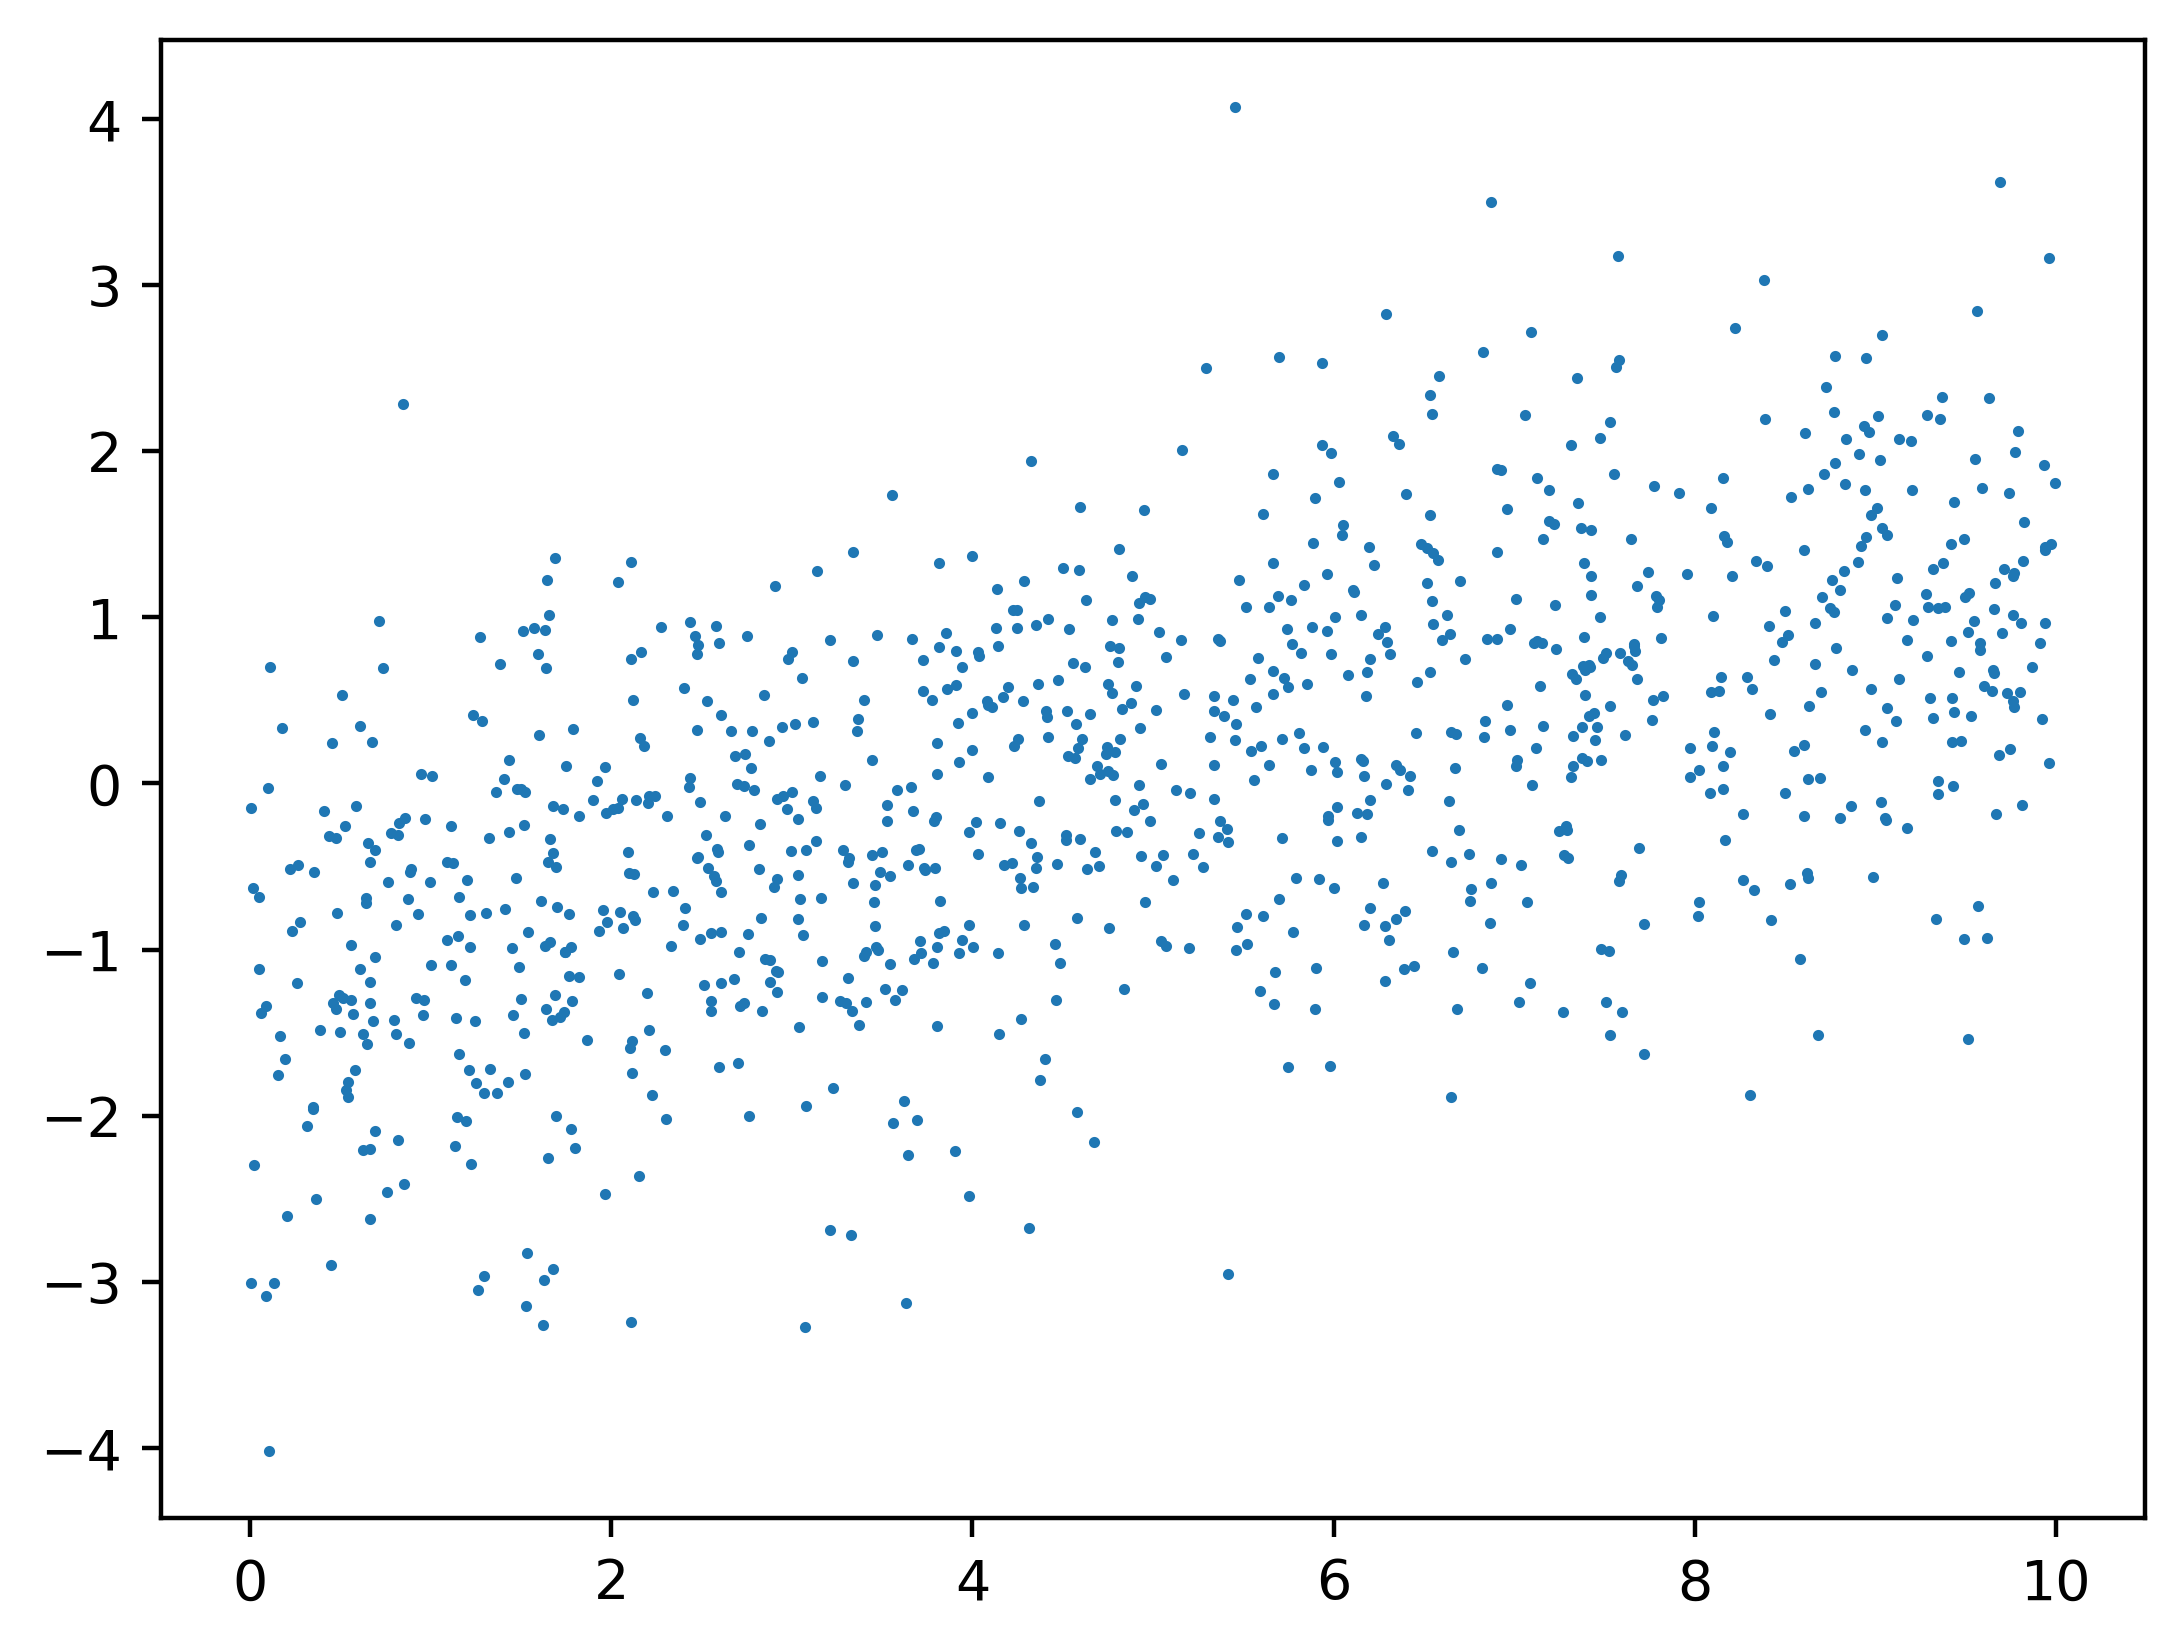

In [19]:
mpl.rcParams['figure.dpi']=400
plt.scatter(X, y, s=1)

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [21]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1489527222709361
[0.23734457]


In [22]:
y_pred = lin_reg.predict(X.reshape(-1,1))

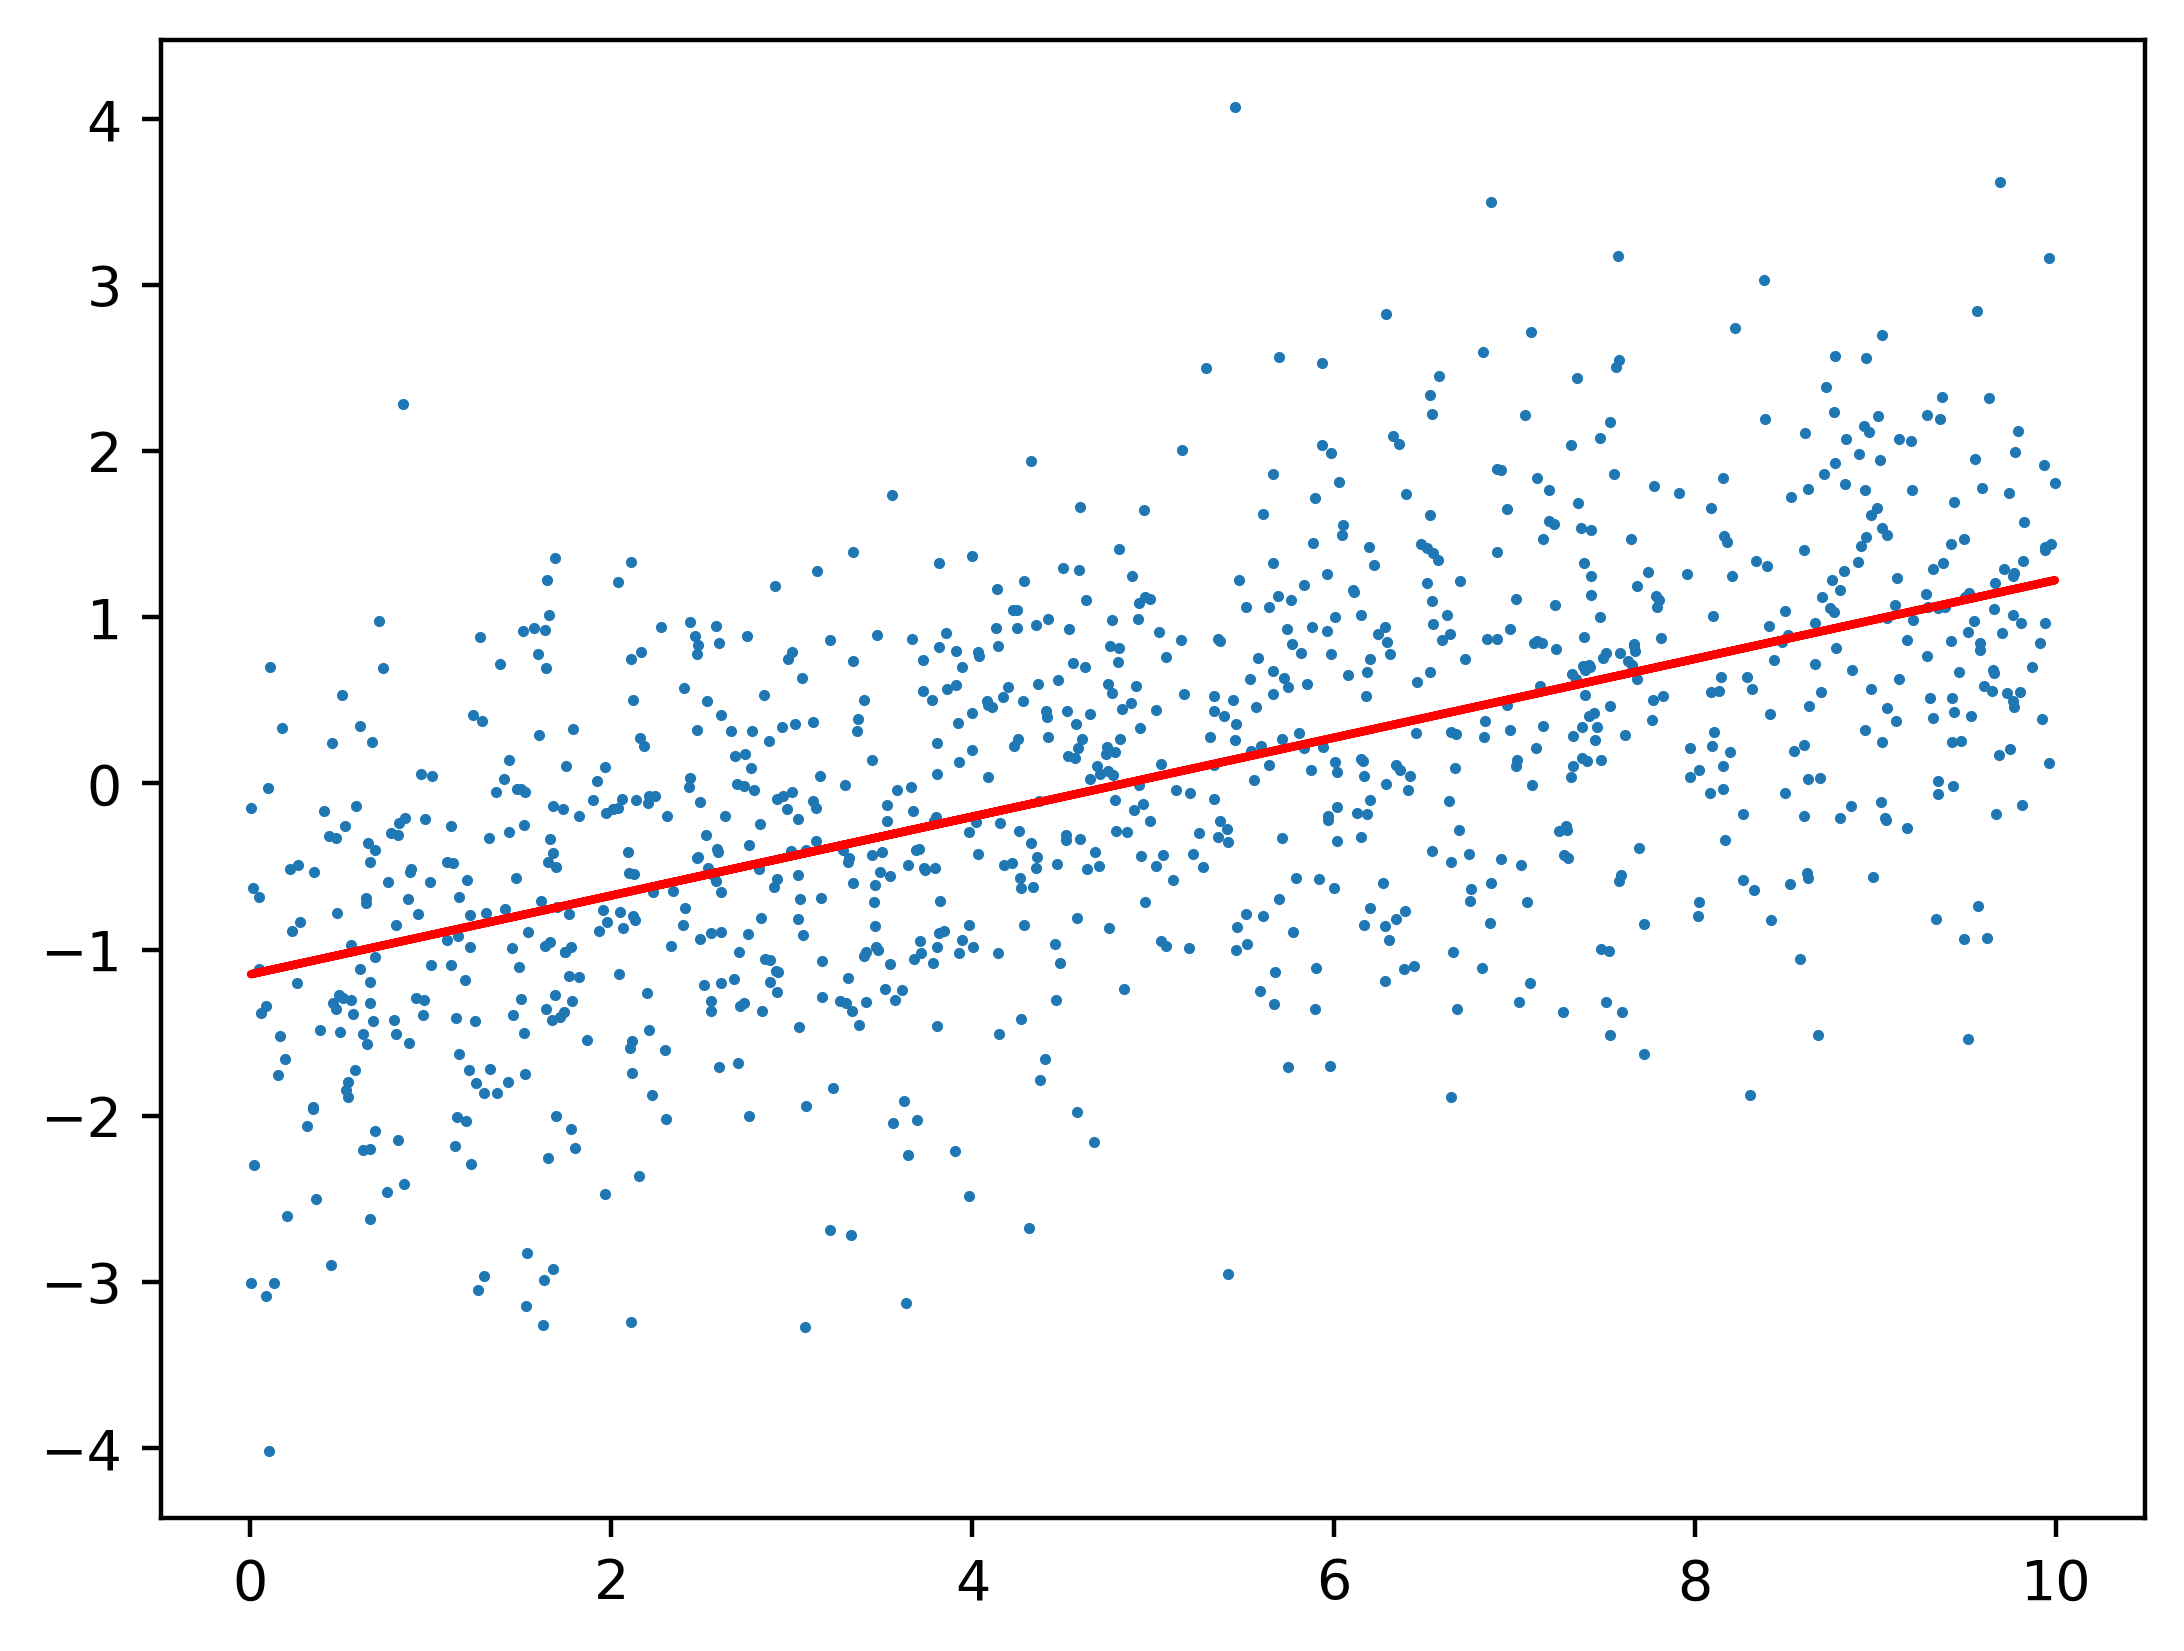

In [23]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, 'r')